IMPORT THE NECESSARY LIBRARIES

In [480]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT THE DATA

In [481]:
data = pd.read_csv("FIFA23_official_data.csv")
data.tail(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN
17659,256376,21 F. Jakobsson,20,https://cdn.sofifa.net/players/256/376/21_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,50,61,IFK Norrköping,https://cdn.sofifa.net/teams/702/30.png,...,No,"<span class=""pos pos29"">RES","Jan 8, 2020",NaN,2021,186cm,78kg,€131K,30.0,NaN


In [482]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

THE NAME VALUES ALL START WITH A WHITESPACE WHICH IS NOT NECESSARILY AN ERROR BUT CAN BE REMOVED

In [484]:
data["Name"]

0            L. Goretzka
1        Bruno Fernandes
2               M. Acuña
3           K. De Bruyne
4             N. Barella
              ...       
17655      Deng Xiongtao
17656     22 Lim Jun Sub
17657           A. Demir
17658       21 S. Czajor
17659    21 F. Jakobsson
Name: Name, Length: 17660, dtype: object

In [485]:
data["Name"]=data["Name"].str.strip()

CHECK FOR MISSING VALUES AND REPLACE THEM CORRECTLY

*CHECK FOR OUTLIERS IN THE NUMERICAL FEATURES

-If there are outliers use the median to replace the null or msising values otherwise use the mean function.

In [486]:
na_sum = data.isna().sum()
columns_with_na = na_sum[na_sum > 0]
for column in columns_with_na.index:
    print(column)

Club
Body Type
Real Face
Position
Joined
Loaned From
Contract Valid Until
Release Clause
Kit Number
Best Overall Rating


REAL FACE

In [487]:
data["Real Face"]

0        Yes
1        Yes
2         No
3        Yes
4        Yes
        ... 
17655     No
17656     No
17657     No
17658     No
17659     No
Name: Real Face, Length: 17660, dtype: object

In [488]:
data["Real Face"].value_counts()

No     15576
Yes     2046
Name: Real Face, dtype: int64

In [489]:
data["Real Face"].fillna(data["Real Face"].mode()[0],inplace=True)
data[data["Real Face"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating


VOLLEYS

In [166]:
data["Volleys"]

0        87.0
1        69.0
2        90.0
3        82.0
4        68.0
         ... 
16705     7.0
16706     7.0
16707     6.0
16708     8.0
16709     NaN
Name: Volleys, Length: 16710, dtype: float64

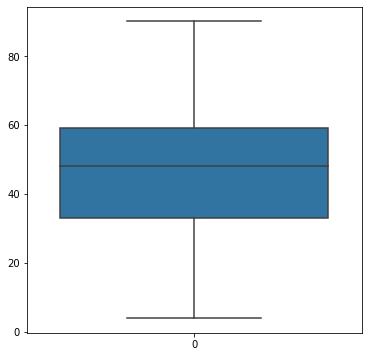

In [167]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Volleys"])
plt.show()

In [168]:
data["Volleys"].fillna(data["Volleys"].mean(),inplace=True)
data[data["Volleys"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


CURVE

In [169]:
data["Curve"]

0        87.0
1        76.0
2        86.0
3        85.0
4        88.0
         ... 
16705    11.0
16706    11.0
16707    12.0
16708    11.0
16709     NaN
Name: Curve, Length: 16710, dtype: float64

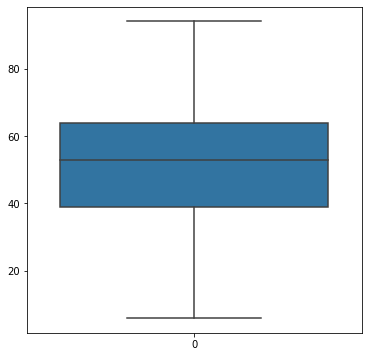

In [170]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Curve"])
plt.show()

In [171]:
data["Curve"].fillna(data["Curve"].mean(),inplace=True)
data[data["Curve"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


AGILITY

In [172]:
data["Agility"]

0        80.0
1        76.0
2        75.0
3        79.0
4        83.0
         ... 
16705    34.0
16706    30.0
16707    36.0
16708    26.0
16709     NaN
Name: Agility, Length: 16710, dtype: float64

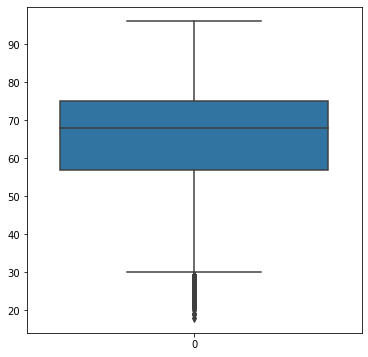

In [173]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Agility"])
plt.show()

In [174]:
data["Agility"].fillna(data["Agility"].median(),inplace=True)
data[data["Agility"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


BALANCE

In [175]:
data['Balance']

0        79.0
1        71.0
2        78.0
3        78.0
4        90.0
         ... 
16705    31.0
16706    24.0
16707    36.0
16708    44.0
16709     NaN
Name: Balance, Length: 16710, dtype: float64

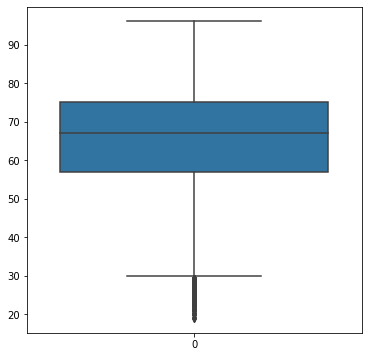

In [176]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Balance"])
plt.show()

In [177]:
data["Balance"].fillna(data["Balance"].median(),inplace=True)
data[data["Balance"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


JUMPING

In [178]:
data["Jumping"]

0        73.0
1        79.0
2        69.0
3        63.0
4        63.0
         ... 
16705    51.0
16706    35.0
16707    51.0
16708    45.0
16709     NaN
Name: Jumping, Length: 16710, dtype: float64

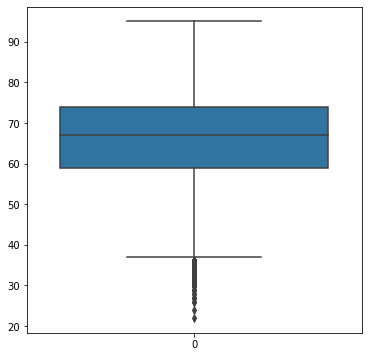

In [179]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Jumping"])
plt.show()

In [180]:
data["Jumping"].fillna(data["Jumping"].median(),inplace=True)
data[data["Jumping"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


INTERCEPTIONS

In [181]:
data["Interceptions"]

0        66.0
1        86.0
2        41.0
3        66.0
4        79.0
         ... 
16705     9.0
16706    13.0
16707    11.0
16708     6.0
16709     NaN
Name: Interceptions, Length: 16710, dtype: float64

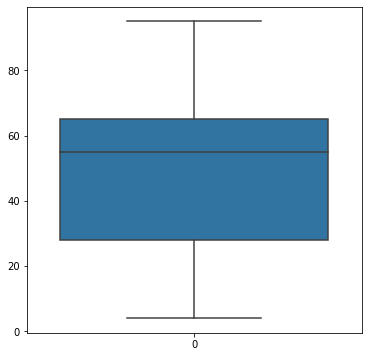

In [182]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Interceptions"])
plt.show()

In [183]:
data["Interceptions"].fillna(data["Interceptions"].mean(),inplace=True)
data[data["Interceptions"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


POSITIONING

In [184]:
data['Positioning']

0        87.0
1        85.0
2        91.0
3        88.0
4        81.0
         ... 
16705     5.0
16706     8.0
16707     7.0
16708     6.0
16709     NaN
Name: Positioning, Length: 16710, dtype: float64

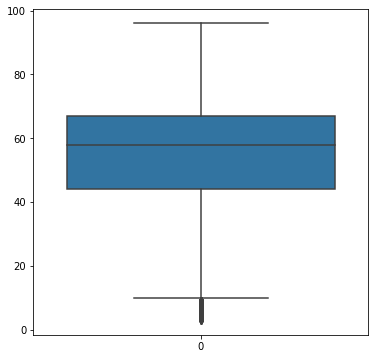

In [185]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Positioning"])
plt.show()

In [186]:
data["Positioning"].fillna(data["Positioning"].mean(),inplace=True)
data[data["Positioning"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


VISION

In [187]:
data["Vision"]

0        90.0
1        84.0
2        84.0
3        94.0
4        82.0
         ... 
16705    29.0
16706    33.0
16707    18.0
16708    31.0
16709     NaN
Name: Vision, Length: 16710, dtype: float64

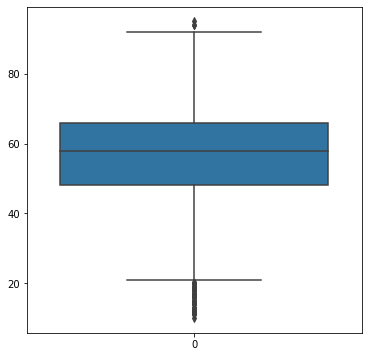

In [188]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Vision"])
plt.show()

In [189]:
data["Vision"].fillna(data["Vision"].median(),inplace=True)
data[data["Vision"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


COMPOSURE

In [190]:
data["Composure"]

0        87.0
1        82.0
2        87.0
3        89.0
4        87.0
         ... 
16705    37.0
16706    29.0
16707    17.0
16708    23.0
16709     NaN
Name: Composure, Length: 16710, dtype: float64

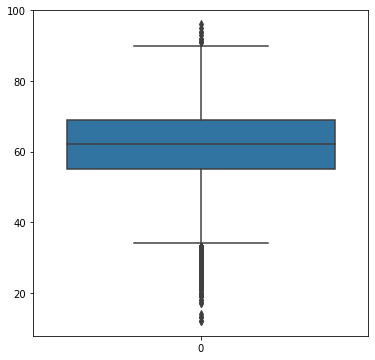

In [191]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Composure"])
plt.show()

In [192]:
data["Composure"].fillna(data["Composure"].median(),inplace=True)
data[data["Composure"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


MARKING

Marking column has alot of missing values, almost 95% of the values.It wouldnt be wise to replace them with the mean or median of the values, so its better labelled "None" / 0.

In [193]:
data["Marking"].isna().sum()

15818

In [194]:
len(data) - data["Marking"].isna().sum()

892

In [195]:
data["Marking"].fillna("None",inplace=True)
data[data["Marking"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


SLIDINGTACKLE

In [196]:
data["SlidingTackle"]

0        65.0
1        77.0
2        38.0
3        53.0
4        82.0
         ... 
16705    12.0
16706    12.0
16707     9.0
16708    13.0
16709     NaN
Name: SlidingTackle, Length: 16710, dtype: float64

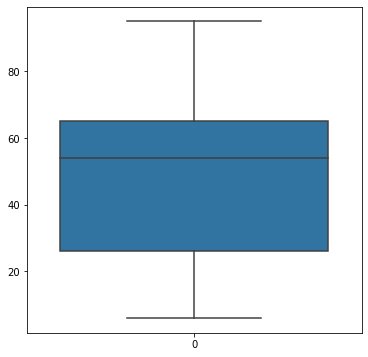

In [197]:
plt.figure(figsize=(6,6))
sns.boxplot(data["SlidingTackle"])
plt.show()

In [198]:
data["SlidingTackle"].fillna(data["SlidingTackle"].mean(),inplace=True)
data[data["SlidingTackle"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


DEFENSIVEAWARENESS

In [199]:
data["DefensiveAwareness"]

0        72.0
1        74.0
2        42.0
3        68.0
4        80.0
         ... 
16705     NaN
16706     5.0
16707    21.0
16708     7.0
16709     NaN
Name: DefensiveAwareness, Length: 16710, dtype: float64

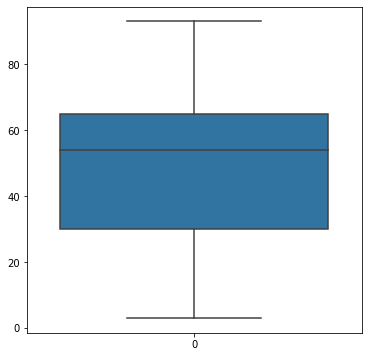

In [200]:
plt.figure(figsize=(6,6))
sns.boxplot(data["DefensiveAwareness"])
plt.show()

In [201]:
data["DefensiveAwareness"].fillna(data["DefensiveAwareness"].mean(),inplace=True)
data[data["DefensiveAwareness"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness


CLUB

In [490]:
data[data["Club"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
162,146562,21 Santi Cazorla,35,https://cdn.sofifa.net/players/146/562/21_60.png,Spain,https://cdn.sofifa.net/flags/es.png,82,82,NaN,https://cdn.sofifa.net/flags/es.png,...,Yes,"<span class=""pos pos28"">SUB",NaN,NaN,NaN,168cm,65kg,NaN,20.0,NaN
383,245308,21 M. Nérez,32,https://cdn.sofifa.net/players/245/308/21_60.png,Uruguay,https://cdn.sofifa.net/flags/uy.png,80,80,NaN,https://cdn.sofifa.net/flags/uy.png,...,No,"<span class=""pos pos7"">LB",NaN,NaN,NaN,178cm,69kg,NaN,3.0,NaN
435,176571,A. Ayew,32,https://cdn.sofifa.net/players/176/571/23_60.png,Ghana,https://cdn.sofifa.net/flags/gh.png,75,75,NaN,https://cdn.sofifa.net/flags/gh.png,...,Yes,"<span class=""pos pos25"">ST",NaN,NaN,NaN,176cm,72kg,NaN,10.0,NaN
463,201922,22 M. Hinteregger,28,https://cdn.sofifa.net/players/201/922/22_60.png,Austria,https://cdn.sofifa.net/flags/at.png,79,79,NaN,https://cdn.sofifa.net/flags/at.png,...,Yes,"<span class=""pos pos6"">LCB",NaN,NaN,NaN,186cm,82kg,NaN,4.0,NaN
497,203890,Š. Vrsaljko,30,https://cdn.sofifa.net/players/203/890/23_60.png,Croatia,https://cdn.sofifa.net/flags/hr.png,79,79,NaN,https://cdn.sofifa.net/flags/hr.png,...,Yes,"<span class=""pos pos3"">RB",NaN,NaN,NaN,181cm,76kg,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16791,253949,20 R. Goss,25,https://cdn.sofifa.net/players/253/949/20_60.png,South Africa,https://cdn.sofifa.net/flags/za.png,61,65,NaN,https://cdn.sofifa.net/flags/za.png,...,No,"<span class=""pos pos28"">SUB",NaN,NaN,NaN,181cm,75kg,NaN,16.0,NaN
16835,257550,22 I. Al Kaabi,28,https://cdn.sofifa.net/players/257/550/22_60.png,United Arab Emirates,https://cdn.sofifa.net/flags/ae.png,59,62,NaN,https://cdn.sofifa.net/flags/ae.png,...,No,NaN,NaN,NaN,NaN,183cm,82kg,NaN,NaN,"<span class=""bp3-tag p p-59"">59</span>"
16968,267767,S. Kittos,20,https://cdn.sofifa.net/players/267/767/23_60.png,Cyprus,https://cdn.sofifa.net/flags/cy.png,58,68,NaN,https://cdn.sofifa.net/flags/cy.png,...,No,NaN,NaN,NaN,NaN,186cm,75kg,NaN,NaN,"<span class=""bp3-tag p p-58"">58</span>"
17004,252359,21 E. Ira Tape,22,https://cdn.sofifa.net/players/252/359/21_60.png,Côte d'Ivoire,https://cdn.sofifa.net/flags/ci.png,61,70,NaN,https://cdn.sofifa.net/flags/ci.png,...,No,"<span class=""pos pos28"">SUB",NaN,NaN,NaN,192cm,85kg,NaN,1.0,NaN


In [491]:
data["Club"].fillna(data["Club"].mode()[0],inplace=True)
data[data["Club"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating


POSITION

In [492]:
data[data["Position"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
682,250,13 D. Beckham,37,https://cdn.sofifa.net/players/000/250/13_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,78,78,Manchester United,https://cdn.sofifa.net/flags/gb-eng.png,...,Yes,NaN,NaN,NaN,NaN,182cm,75kg,NaN,NaN,NaN
908,236298,E. Atuesta,25,https://cdn.sofifa.net/players/236/298/23_60.png,Colombia,https://cdn.sofifa.net/flags/co.png,75,82,Manchester United,https://cdn.sofifa.net/flags/co.png,...,No,NaN,NaN,NaN,NaN,180cm,71kg,NaN,NaN,NaN
1112,31432,17 D. Drogba,38,https://cdn.sofifa.net/players/031/432/17_60.png,Côte d'Ivoire,https://cdn.sofifa.net/flags/ci.png,81,81,Manchester United,https://cdn.sofifa.net/flags/ci.png,...,Yes,NaN,NaN,NaN,NaN,189cm,80kg,NaN,NaN,NaN
1926,1625,15 T. Henry,36,https://cdn.sofifa.net/players/001/625/15_60.png,France,https://cdn.sofifa.net/flags/fr.png,79,79,Manchester United,https://cdn.sofifa.net/flags/fr.png,...,Yes,NaN,NaN,NaN,NaN,188cm,83kg,NaN,NaN,NaN
2594,138449,18 Kaká,35,https://cdn.sofifa.net/players/138/449/18_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,80,80,Manchester United,https://cdn.sofifa.net/flags/br.png,...,Yes,NaN,NaN,NaN,NaN,186cm,83kg,NaN,NaN,NaN
5031,269908,M. Elia,26,https://cdn.sofifa.net/players/269/908/23_60.png,Cyprus,https://cdn.sofifa.net/flags/cy.png,65,66,Manchester United,https://cdn.sofifa.net/flags/cy.png,...,No,NaN,NaN,NaN,NaN,184cm,78kg,NaN,NaN,NaN
5303,195901,15 M. Saucedo,28,https://cdn.sofifa.net/players/195/901/15_60.png,Bolivia,https://cdn.sofifa.net/flags/bo.png,66,66,Manchester United,https://cdn.sofifa.net/flags/bo.png,...,No,NaN,NaN,NaN,NaN,186cm,75kg,NaN,NaN,NaN
5935,268980,M. Hassan,30,https://cdn.sofifa.net/players/268/980/23_60.png,Qatar,https://cdn.sofifa.net/flags/qa.png,65,65,Manchester United,https://cdn.sofifa.net/flags/qa.png,...,No,NaN,NaN,NaN,NaN,170cm,62kg,NaN,NaN,NaN
6370,268985,S. Al Brake,26,https://cdn.sofifa.net/players/268/985/23_60.png,Qatar,https://cdn.sofifa.net/flags/qa.png,66,68,Manchester United,https://cdn.sofifa.net/flags/qa.png,...,No,NaN,NaN,NaN,NaN,180cm,62kg,NaN,NaN,NaN
7116,270643,K. Muneer,24,https://cdn.sofifa.net/players/270/643/23_60.png,Qatar,https://cdn.sofifa.net/flags/qa.png,63,67,Manchester United,https://cdn.sofifa.net/flags/qa.png,...,No,NaN,NaN,NaN,NaN,174cm,67kg,NaN,NaN,"<span class=""bp3-tag p p-64"">64</span>"


In [493]:
data['Position'].unique()

array(['<span class="pos pos28">SUB', '<span class="pos pos15">LCM',
       '<span class="pos pos7">LB', '<span class="pos pos13">RCM',
       '<span class="pos pos9">RDM', '<span class="pos pos6">LCB',
       '<span class="pos pos24">RS', '<span class="pos pos3">RB',
       '<span class="pos pos16">LM', '<span class="pos pos26">LS',
       '<span class="pos pos2">RWB', '<span class="pos pos10">CDM',
       '<span class="pos pos23">RW', '<span class="pos pos12">RM',
       '<span class="pos pos22">LF', '<span class="pos pos8">LWB',
       '<span class="pos pos25">ST', '<span class="pos pos18">CAM',
       '<span class="pos pos11">LDM', '<span class="pos pos29">RES',
       '<span class="pos pos27">LW', '<span class="pos pos21">CF',
       '<span class="pos pos20">RF', '<span class="pos pos4">RCB',
       '<span class="pos pos14">CM', '<span class="pos pos5">CB', nan,
       '<span class="pos pos17">RAM', '<span class="pos pos19">LAM',
       '<span class="pos pos0">GK'], dtype=object)

In [494]:
data["Position"] = data["Position"].str.split('"').str[-1].str.split(">").str[-1]

In [495]:
data["Position"]

0        SUB
1        LCM
2         LB
3        RCM
4        RCM
        ... 
17655    RES
17656    RES
17657    RES
17658    RES
17659    RES
Name: Position, Length: 17660, dtype: object

In [496]:
data["Position"].fillna(data["Position"].mode()[0],inplace=True)
data[data["Position"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating


JERSEY NUMBER

In [499]:
data[data["Jersey Number"].isnull()].head()

*CHECK FOR OUTLIERS IN JERSEY NUMBER

-If there are outliers use the median to replace the null or msising values otherwise use the mean function.

In [352]:
plt.figure(figsize=(6,6))
sns.boxplot(data["Jersey Number"]);
plt.show()

In [ ]:
data["Jersey Number"].fillna(data["Jersey Number"].median(),inplace=True)
data[data["Jersey Number"].isnull()]

JOINED

In [500]:
data['Joined']

0         Jul 1, 2018
1        Jan 30, 2020
2        Sep 14, 2020
3        Aug 30, 2015
4         Sep 1, 2020
             ...     
17655    Apr 11, 2022
17656     Jan 1, 2022
17657     Jun 6, 2021
17658     Jan 1, 2020
17659     Jan 8, 2020
Name: Joined, Length: 17660, dtype: object

In [501]:
data[data["Joined"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
18,194765,A. Griezmann,31,https://cdn.sofifa.net/players/194/765/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,83,83,Atlético de Madrid,https://cdn.sofifa.net/teams/240/30.png,...,Yes,RS,NaN,"<a href=""/team/241/fc-barcelona/"">FC Barcelona...","Jun 30, 2023",176cm,73kg,NaN,8.0,NaN
34,212462,Alex Telles,29,https://cdn.sofifa.net/players/212/462/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,80,80,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,Yes,SUB,NaN,"<a href=""/team/11/manchester-united/"">Manchest...","Jun 30, 2023",181cm,71kg,NaN,3.0,NaN
38,220651,Angeliño,25,https://cdn.sofifa.net/players/220/651/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,85,TSG Hoffenheim,https://cdn.sofifa.net/teams/10029/30.png,...,No,LWB,NaN,"<a href=""/team/112172/rb-leipzig/"">RB Leipzig</a>","Jun 30, 2023",171cm,69kg,NaN,11.0,NaN
44,232411,C. Nkunku,24,https://cdn.sofifa.net/players/232/411/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,86,89,RB Leipzig,https://cdn.sofifa.net/teams/112172/30.png,...,Yes,SUB,NaN,NaN,NaN,175cm,73kg,€166.9M,12.0,NaN
49,223697,R. Gosens,27,https://cdn.sofifa.net/players/223/697/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,LM,NaN,"<a href=""/team/39/atalanta/"">Atalanta</a>","Jun 30, 2023",183cm,76kg,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17378,254122,H. Cartwright,20,https://cdn.sofifa.net/players/254/122/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,56,69,Peterborough United,https://cdn.sofifa.net/teams/1938/30.png,...,No,SUB,NaN,"<a href=""/team/1952/hull-city/"">Hull City</a>","Jun 30, 2023",191cm,82kg,NaN,13.0,NaN
17386,258928,V. Sinisalo,20,https://cdn.sofifa.net/players/258/928/23_60.png,Finland,https://cdn.sofifa.net/flags/fi.png,55,72,Burton Albion,https://cdn.sofifa.net/teams/15015/30.png,...,No,SUB,NaN,"<a href=""/team/2/aston-villa/"">Aston Villa</a>","Jun 30, 2023",196cm,76kg,NaN,24.0,NaN
17535,241525,T. Ashby-Hammond,23,https://cdn.sofifa.net/players/241/525/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,54,63,Stevenage,https://cdn.sofifa.net/teams/361/30.png,...,No,SUB,NaN,"<a href=""/team/144/fulham/"">Fulham</a>","Jun 30, 2023",190cm,87kg,NaN,12.0,NaN
17590,270756,S. Ghidotti,22,https://cdn.sofifa.net/players/270/756/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,50,57,Como,https://cdn.sofifa.net/teams/1745/30.png,...,No,SUB,NaN,"<a href=""/team/110374/fiorentina/"">Fiorentina</a>","Jun 30, 2023",193cm,82kg,NaN,1.0,NaN


In [502]:
data["Joined"] = pd.to_datetime(data["Joined"])

FILLING MISSING VALUES FOR DATETIME VALUES

--it is not appropriate to use the mean or mode since datetime values are not numeric or categorical in nature.Instead you use:

*Forward-fill or backward-fill

*Interpolation

*Seasonal decomposition

*Regression models(to predict the values)

Here we are using Interpolation.

In [503]:
joindata=data.sort_values(by=["Joined"])
joindata['Joined'] = joindata['Joined'].interpolate(method ='ffill')
data['Joined'].fillna(joindata['Joined'], inplace=True)
data["Joined"]

0       2018-07-01
1       2020-01-30
2       2020-09-14
3       2015-08-30
4       2020-09-01
           ...    
17655   2022-04-11
17656   2022-01-01
17657   2021-06-06
17658   2020-01-01
17659   2020-01-08
Name: Joined, Length: 17660, dtype: datetime64[ns]

In [504]:
data[data["Joined"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating


### CREATE A NEW COLUMN FOR YEARS JOINED

In [505]:
data["Year_Joined"]= data["Joined"].dt.year
data["Year_Joined"]

0        2018
1        2020
2        2020
3        2015
4        2020
         ... 
17655    2022
17656    2022
17657    2021
17658    2020
17659    2020
Name: Year_Joined, Length: 17660, dtype: int64

LOANED FROM

In [506]:
data["Loaned From"].value_counts()

<a href="/team/1/arsenal/">Arsenal</a>                     12
<a href="/team/45/juventus/">Juventus</a>                  12
<a href="/team/1876/river-plate/">River Plate</a>          12
<a href="/team/10/manchester-city/">Manchester City</a>    12
<a href="/team/44/inter/">Inter</a>                        11
                                                           ..
<a href="/team/181/dundee-united/">Dundee United</a>        1
<a href="/team/820/aalborg-bk/">Aalborg BK</a>              1
<a href="/team/1438/santa-clara/">Santa Clara</a>           1
<a href="/team/1516/fc-midtjylland/">FC Midtjylland</a>     1
<a href="/team/1843/palermo/">Palermo</a>                   1
Name: Loaned From, Length: 270, dtype: int64

In [507]:
data["Loaned From"] = data["Loaned From"].str.split(">").dropna().str[-2].str.split("<").str[0]

In [508]:
data["Loaned From"].fillna("None",inplace=True)
data[data["Loaned From"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Year_Joined


  CONTRACT VALID UNTIL

In [509]:
data[data["Contract Valid Until"].isnull()].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Year_Joined
44,232411,C. Nkunku,24,https://cdn.sofifa.net/players/232/411/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,86,89,RB Leipzig,https://cdn.sofifa.net/teams/112172/30.png,...,SUB,2022-08-11,None,NaN,175cm,73kg,€166.9M,12.0,NaN,2022
103,173731,G. Bale,32,https://cdn.sofifa.net/players/173/731/23_60.png,Wales,https://cdn.sofifa.net/flags/gb-wls.png,81,81,Los Angeles FC,https://cdn.sofifa.net/teams/112996/30.png,...,RS,2022-08-11,None,NaN,185cm,82kg,€30.8M,11.0,NaN,2022
105,225375,K. Laimer,25,https://cdn.sofifa.net/players/225/375/23_60.png,Austria,https://cdn.sofifa.net/flags/at.png,83,84,RB Leipzig,https://cdn.sofifa.net/teams/112172/30.png,...,LDM,2022-08-11,None,NaN,180cm,72kg,€68.3M,20.0,NaN,2022
154,230256,Adryan Zonta,30,https://cdn.sofifa.net/players/230/256/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,81,81,RB Bragantino,https://cdn.sofifa.net/teams/112472/30.png,...,LB,2022-08-11,None,NaN,172cm,68kg,€41.8M,7.0,NaN,2022
162,146562,21 Santi Cazorla,35,https://cdn.sofifa.net/players/146/562/21_60.png,Spain,https://cdn.sofifa.net/flags/es.png,82,82,Manchester United,https://cdn.sofifa.net/flags/es.png,...,SUB,2022-08-11,None,NaN,168cm,65kg,NaN,20.0,NaN,2022


In [510]:
data["Contract Valid Until"]

0        2026
1        2026
2        2024
3        2025
4        2026
         ... 
17655    2027
17656    2026
17657    2023
17658    2021
17659    2021
Name: Contract Valid Until, Length: 17660, dtype: object

In [511]:
data["Contract Valid Until"]= pd.to_datetime(data["Contract Valid Until"])
data["Contract Valid Until"]= data["Contract Valid Until"].dt.year
contractdata=data.sort_values(by=["Contract Valid Until"])
contractdata['Contract Valid Until'] = contractdata['Contract Valid Until'].interpolate(method ='ffill')
data['Contract Valid Until'].fillna(contractdata['Contract Valid Until'], inplace=True)
data['Contract Valid Until']

0        2026.0
1        2026.0
2        2024.0
3        2025.0
4        2026.0
          ...  
17655    2027.0
17656    2026.0
17657    2023.0
17658    2021.0
17659    2021.0
Name: Contract Valid Until, Length: 17660, dtype: float64

In [512]:
data[data["Contract Valid Until"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Year_Joined


In [513]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating,Year_Joined
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,SUB,2018-07-01,None,2026.0,189cm,82kg,€157M,8.0,NaN,2018
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,LCM,2020-01-30,None,2026.0,179cm,69kg,€155M,8.0,NaN,2020
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,LB,2020-09-14,None,2024.0,172cm,69kg,€97.7M,19.0,NaN,2020
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,RCM,2015-08-30,None,2025.0,181cm,70kg,€198.9M,17.0,NaN,2015
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,RCM,2020-09-01,None,2026.0,172cm,68kg,€154.4M,23.0,NaN,2020


In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        17660 non-null  int64         
 1   Name                      17660 non-null  object        
 2   Age                       17660 non-null  int64         
 3   Photo                     17660 non-null  object        
 4   Nationality               17660 non-null  object        
 5   Flag                      17660 non-null  object        
 6   Overall                   17660 non-null  int64         
 7   Potential                 17660 non-null  int64         
 8   Club                      17660 non-null  object        
 9   Club Logo                 17660 non-null  object        
 10  Value                     17660 non-null  object        
 11  Wage                      17660 non-null  object        
 12  Special           

CHECK IF THERE ARE FEATURES IN THE WRONG DATATYPE

Height and weight are objects instead of numerical data

In [515]:
data["Height"]

0        189cm
1        179cm
2        172cm
3        181cm
4        172cm
         ...  
17655    190cm
17656    195cm
17657    190cm
17658    187cm
17659    186cm
Name: Height, Length: 17660, dtype: object

In [516]:
data["Weight"]

0        82kg
1        69kg
2        69kg
3        70kg
4        68kg
         ... 
17655    78kg
17656    84kg
17657    82kg
17658    79kg
17659    78kg
Name: Weight, Length: 17660, dtype: object

In [517]:
# data["Height"]=data["Height"].str.split("'")
# data["Height"]

In [518]:
data["Height"]=data["Height"].str.split("cm")
data["Height"]

0        [189, ]
1        [179, ]
2        [172, ]
3        [181, ]
4        [172, ]
          ...   
17655    [190, ]
17656    [195, ]
17657    [190, ]
17658    [187, ]
17659    [186, ]
Name: Height, Length: 17660, dtype: object

In [519]:
data["Height"] = data["Height"].str[0]
data["Height"].astype(float)
data["Height"]

0        189
1        179
2        172
3        181
4        172
        ... 
17655    190
17656    195
17657    190
17658    187
17659    186
Name: Height, Length: 17660, dtype: object

In [520]:
data["Weight"]=data["Weight"].str.split("kg")
data["Weight"]

0        [82, ]
1        [69, ]
2        [69, ]
3        [70, ]
4        [68, ]
          ...  
17655    [78, ]
17656    [84, ]
17657    [82, ]
17658    [79, ]
17659    [78, ]
Name: Weight, Length: 17660, dtype: object

In [521]:
data["Weight"] = data["Weight"].str[0] 
data["Weight"] = data["Weight"].astype(float)
data["Weight"]

0        82.0
1        69.0
2        69.0
3        70.0
4        68.0
         ... 
17655    78.0
17656    84.0
17657    82.0
17658    79.0
17659    78.0
Name: Weight, Length: 17660, dtype: float64

In [522]:
data["Weight"] = data["Weight"] * 2.205
data["Weight"]

0        180.810
1        152.145
2        152.145
3        154.350
4        149.940
          ...   
17655    171.990
17656    185.220
17657    180.810
17658    174.195
17659    171.990
Name: Weight, Length: 17660, dtype: float64

In [523]:
# data["Height"] = data["Height"].apply(lambda x: (((int(x[0]) * 12) + int(x[1]))*2.54))
# data["Height"]

In [524]:
data.rename(columns={"Height": 'Height(cm.)', "Weight": 'Weight(lbs.)'},inplace=True)

In [525]:
data["Weight(lbs.)"]

0        180.810
1        152.145
2        152.145
3        154.350
4        149.940
          ...   
17655    171.990
17656    185.220
17657    180.810
17658    174.195
17659    171.990
Name: Weight(lbs.), Length: 17660, dtype: float64

In [526]:
data["Weight(lbs.)"] = data["Weight(lbs.)"].astype(float)
data["Height(cm.)"]=data["Height(cm.)"].astype(float)

In [527]:
# data["Weight(lbs.)"]= data["Weight(lbs.)"].str.split("lbs").str[0]
# data["Weight(lbs.)"]

In [528]:
# data["Weight(lbs.)"] = data["Weight(lbs.)"].astype(int)
# data["Weight(lbs.)"]

BODY TYPE CATEGORY 

In [529]:
data["Body Type"]

0                  Unique
1                  Unique
2        Stocky (170-185)
3                  Unique
4           Normal (170-)
               ...       
17655       Normal (185+)
17656         Lean (185+)
17657         Lean (185+)
17658       Normal (185+)
17659       Normal (185+)
Name: Body Type, Length: 17660, dtype: object

In [530]:
data["Body Type"].value_counts()

Normal (170-185)    6248
Lean (170-185)      3943
Normal (185+)       3470
Lean (185+)         1841
Normal (170-)        696
Lean (170-)          525
Stocky (170-185)     435
Stocky (185+)        245
Unique               133
Stocky (170-)         86
Name: Body Type, dtype: int64

In [531]:
data["Height(cm.)"]

0        189.0
1        179.0
2        172.0
3        181.0
4        172.0
         ...  
17655    190.0
17656    195.0
17657    190.0
17658    187.0
17659    186.0
Name: Height(cm.), Length: 17660, dtype: float64

*The body type figure are categorized based on their heights, there's actually no problem with this category.

*The last 6 values are players names which have their own body types and are unique so they are not errors.
*E.G: Normal(170-185): Basically means the player is within the 170-185cm height and has a normal body size.

In [532]:
pd.crosstab(data["Body Type"],data["Height(cm.)"])

Height(cm.),149.0,155.0,156.0,157.0,158.0,160.0,161.0,162.0,163.0,164.0,...,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,206.0
Body Type,,,,,,,,,,,,,,,,,,,,,
Lean (170-),1,0,0,0,0,6,3,5,10,11,...,0,0,0,0,0,0,0,0,0,0
Lean (170-185),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lean (185+),0,0,0,0,0,0,0,0,0,0,...,35,16,23,5,3,5,4,3,0,1
Normal (170-),0,2,1,1,3,10,6,5,12,17,...,0,0,0,0,0,0,0,0,0,0
Normal (170-185),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal (185+),0,0,0,0,0,0,0,0,0,0,...,61,34,29,7,5,5,6,1,1,1
Stocky (170-),0,0,0,0,1,2,1,1,5,2,...,0,0,0,0,0,0,0,0,0,0
Stocky (170-185),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stocky (185+),0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,1,0,0,0


In [533]:
data[data["Body Type"]=="Akinfenwa"]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause,Kit Number,Best Overall Rating,Year_Joined


In [534]:
data[data["Body Type"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause,Kit Number,Best Overall Rating,Year_Joined
6333,5003,08 Cafu,37,https://cdn.sofifa.net/players/005/003/08_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,83,88,AC Milan,https://cdn.sofifa.net/teams/47/30.png,...,RES,2022-08-11,None,2007.0,176.0,165.375,NaN,2.0,NaN,2022
7725,1418,08 J. Micoud,33,https://cdn.sofifa.net/players/001/418/08_60.png,France,https://cdn.sofifa.net/flags/fr.png,84,84,FC Girondins de Bordeaux,https://cdn.sofifa.net/teams/59/30.png,...,SUB,2022-08-11,None,2008.0,185.0,169.785,NaN,7.0,NaN,2022
7919,13940,10 J. Koller,36,https://cdn.sofifa.net/players/013/940/10_60.png,Czech Republic,https://cdn.sofifa.net/flags/cz.png,78,80,Manchester United,https://cdn.sofifa.net/flags/cz.png,...,SUB,2022-08-11,None,2031.0,202.0,233.730,NaN,NaN,"<span class=""bp3-tag p p-78"">78</span>",2022
8061,52241,10 H. Larsson,37,https://cdn.sofifa.net/players/052/241/10_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,76,83,Manchester United,https://cdn.sofifa.net/flags/se.png,...,SUB,2022-08-11,None,2031.0,177.0,165.375,NaN,NaN,"<span class=""bp3-tag p p-76"">76</span>",2022
8538,7854,10 Sérgio Conceição,34,https://cdn.sofifa.net/players/007/854/10_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,78,83,Manchester United,https://cdn.sofifa.net/flags/pt.png,...,SUB,2022-08-11,None,2031.0,177.0,171.990,NaN,NaN,"<span class=""bp3-tag p p-80"">80</span>",2022
8600,4233,08 C. Reyna,33,https://cdn.sofifa.net/players/004/233/08_60.png,United States,https://cdn.sofifa.net/flags/us.png,76,80,New York Red Bulls,https://cdn.sofifa.net/teams/689/30.png,...,RCM,2022-08-11,None,2009.0,178.0,156.555,NaN,10.0,NaN,2022
9446,121627,10 M. Lewandowski,30,https://cdn.sofifa.net/players/121/627/10_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,72,74,Manchester United,https://cdn.sofifa.net/flags/pl.png,...,RCM,2022-08-11,None,2031.0,185.0,185.220,NaN,18.0,NaN,2022
10541,142619,10 N. Frutos,28,https://cdn.sofifa.net/players/142/619/10_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,75,78,RSC Anderlecht,https://cdn.sofifa.net/teams/229/30.png,...,ST,2022-08-11,None,2012.0,194.0,194.040,NaN,19.0,NaN,2022
10679,1124,10 T. Locatelli,33,https://cdn.sofifa.net/players/001/124/10_60.png,Italy,https://cdn.sofifa.net/flags/it.png,72,78,Mantova,https://cdn.sofifa.net/teams/111433/30.png,...,RES,2022-08-11,None,2009.0,175.0,158.760,NaN,20.0,NaN,2022
10704,1183,10 F. Cannavaro,35,https://cdn.sofifa.net/players/001/183/10_60.png,Italy,https://cdn.sofifa.net/flags/it.png,82,89,Juventus,https://cdn.sofifa.net/teams/45/30.png,...,RCB,2022-08-11,None,2010.0,176.0,165.375,NaN,5.0,NaN,2022


In [536]:
data["Body Type"][(data["Height(cm.)"]>170) & (data["Height(cm.)"]<185)].fillna(data["Body Type"][(data["Height(cm.)"]>170) & (data["Height(cm.)"]<185)].mode()[0],inplace=True)

In [537]:
data["Body Type"][data["Height(cm.)"]<=170].fillna(data["Body Type"][data["Height(cm.)"]<=170].mode()[0],inplace=True)

In [538]:
data["Body Type"][data["Height(cm.)"]>=185].fillna(data["Body Type"][data["Height(cm.)"]>=185].mode()[0],inplace=True)

In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        17660 non-null  int64         
 1   Name                      17660 non-null  object        
 2   Age                       17660 non-null  int64         
 3   Photo                     17660 non-null  object        
 4   Nationality               17660 non-null  object        
 5   Flag                      17660 non-null  object        
 6   Overall                   17660 non-null  int64         
 7   Potential                 17660 non-null  int64         
 8   Club                      17660 non-null  object        
 9   Club Logo                 17660 non-null  object        
 10  Value                     17660 non-null  object        
 11  Wage                      17660 non-null  object        
 12  Special           

RELEASE CLAUSE

In [540]:
data["Release Clause"] = data["Release Clause"].str.split("").str[2:].str.join("")
data["Release Clause"]

0          157M
1          155M
2         97.7M
3        198.9M
4        154.4M
          ...  
17655      218K
17656      188K
17657      142K
17658      214K
17659      131K
Name: Release Clause, Length: 17660, dtype: object

In [541]:
data.rename(columns={"Release Clause":"Release Clause(£)"},inplace=True)

In [542]:
data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="M"]=(data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="M"].str[:-1].astype(float)*1000000)
data["Release Clause(£)"]

C:\Users\user\AppData\Local\Temp\ipykernel_13800\720313503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="M"]=(data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="M"].str[:-1].astype(float)*1000000)


0        157000000.0
1        155000000.0
2         97700000.0
3        198900000.0
4        154400000.0
            ...     
17655           218K
17656           188K
17657           142K
17658           214K
17659           131K
Name: Release Clause(£), Length: 17660, dtype: object

In [543]:
data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="K"]=(data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)
data["Release Clause(£)"]

C:\Users\user\AppData\Local\Temp\ipykernel_13800\1131213102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="K"]=(data["Release Clause(£)"][data["Release Clause(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)


0        157000000.0
1        155000000.0
2         97700000.0
3        198900000.0
4        154400000.0
            ...     
17655       218000.0
17656       188000.0
17657       142000.0
17658       214000.0
17659       131000.0
Name: Release Clause(£), Length: 17660, dtype: object

In [544]:
data["Release Clause(£)"] = data["Release Clause(£)"].astype(float)
data["Release Clause(£)"]

0        157000000.0
1        155000000.0
2         97700000.0
3        198900000.0
4        154400000.0
            ...     
17655       218000.0
17656       188000.0
17657       142000.0
17658       214000.0
17659       131000.0
Name: Release Clause(£), Length: 17660, dtype: float64

In [545]:
data[data["Release Clause(£)"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
18,194765,A. Griezmann,31,https://cdn.sofifa.net/players/194/765/23_60.png,France,https://cdn.sofifa.net/flags/fr.png,83,83,Atlético de Madrid,https://cdn.sofifa.net/teams/240/30.png,...,RS,2022-08-11,FC Barcelona,2023.0,176.0,160.965,NaN,8.0,NaN,2022
34,212462,Alex Telles,29,https://cdn.sofifa.net/players/212/462/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,80,80,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,SUB,2022-08-11,Manchester United,2023.0,181.0,156.555,NaN,3.0,NaN,2022
38,220651,Angeliño,25,https://cdn.sofifa.net/players/220/651/23_60.png,Spain,https://cdn.sofifa.net/flags/es.png,83,85,TSG Hoffenheim,https://cdn.sofifa.net/teams/10029/30.png,...,LWB,2022-08-11,RB Leipzig,2023.0,171.0,152.145,NaN,11.0,NaN,2022
49,223697,R. Gosens,27,https://cdn.sofifa.net/players/223/697/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Inter,https://cdn.sofifa.net/teams/44/30.png,...,LM,2022-08-11,Atalanta,2023.0,183.0,167.580,NaN,8.0,NaN,2022
50,181291,G. Wijnaldum,31,https://cdn.sofifa.net/players/181/291/23_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,80,80,Roma,https://cdn.sofifa.net/teams/52/30.png,...,LCM,2022-08-11,Paris Saint-Germain,2023.0,175.0,163.170,NaN,25.0,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17378,254122,H. Cartwright,20,https://cdn.sofifa.net/players/254/122/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,56,69,Peterborough United,https://cdn.sofifa.net/teams/1938/30.png,...,SUB,2022-08-11,Hull City,2023.0,191.0,180.810,NaN,13.0,NaN,2022
17386,258928,V. Sinisalo,20,https://cdn.sofifa.net/players/258/928/23_60.png,Finland,https://cdn.sofifa.net/flags/fi.png,55,72,Burton Albion,https://cdn.sofifa.net/teams/15015/30.png,...,SUB,2022-08-11,Aston Villa,2023.0,196.0,167.580,NaN,24.0,NaN,2022
17535,241525,T. Ashby-Hammond,23,https://cdn.sofifa.net/players/241/525/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,54,63,Stevenage,https://cdn.sofifa.net/teams/361/30.png,...,SUB,2022-08-11,Fulham,2023.0,190.0,191.835,NaN,12.0,NaN,2022
17590,270756,S. Ghidotti,22,https://cdn.sofifa.net/players/270/756/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,50,57,Como,https://cdn.sofifa.net/teams/1745/30.png,...,SUB,2022-08-11,Fiorentina,2023.0,193.0,180.810,NaN,1.0,NaN,2022


*CHECK FOR OUTLIERS IN RELEASE CLAUSE

-If there are outliers use the median to replace the null or msising values otherwise use the mean function.

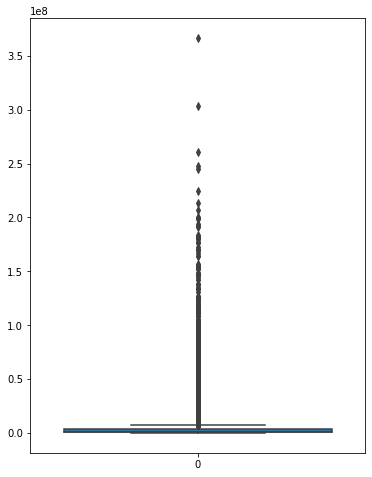

In [546]:
plt.figure(figsize=(6,8))
sns.boxplot(data["Release Clause(£)"]);
plt.show()

In [547]:
data["Release Clause(£)"].fillna(data["Release Clause(£)"].median(),inplace=True)
data[data["Release Clause(£)"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined


VALUE

In [549]:
data["Value"] = data["Value"].str.split("").str[2:].str.join("")
data["Value"]

0           91M
1         78.5M
2         46.5M
3        107.5M
4         89.5M
          ...  
17655      100K
17656      100K
17657       70K
17658       90K
17659       90K
Name: Value, Length: 17660, dtype: object

In [550]:
data.rename(columns={"Value":"Value(£)"},inplace=True)

In [551]:
data["Value(£)"][data["Value(£)"].str[-1]=="M"]=(data["Value(£)"][data["Value(£)"].str[-1]=="M"].str[:-1].astype(float)*1000000)
data["Value(£)"]

C:\Users\user\AppData\Local\Temp\ipykernel_13800\1391880999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Value(£)"][data["Value(£)"].str[-1]=="M"]=(data["Value(£)"][data["Value(£)"].str[-1]=="M"].str[:-1].astype(float)*1000000)


0         91000000.0
1         78500000.0
2         46500000.0
3        107500000.0
4         89500000.0
            ...     
17655           100K
17656           100K
17657            70K
17658            90K
17659            90K
Name: Value(£), Length: 17660, dtype: object

In [552]:
data["Value(£)"][data["Value(£)"].str[-1]=="K"]=(data["Value(£)"][data["Value(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)
data["Value(£)"]

C:\Users\user\AppData\Local\Temp\ipykernel_13800\2423829921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Value(£)"][data["Value(£)"].str[-1]=="K"]=(data["Value(£)"][data["Value(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)


0         91000000.0
1         78500000.0
2         46500000.0
3        107500000.0
4         89500000.0
            ...     
17655       100000.0
17656       100000.0
17657        70000.0
17658        90000.0
17659        90000.0
Name: Value(£), Length: 17660, dtype: object

In [553]:
data["Value(£)"] = data["Value(£)"].astype(float)

In [554]:
data["Value(£)"]

0         91000000.0
1         78500000.0
2         46500000.0
3        107500000.0
4         89500000.0
            ...     
17655       100000.0
17656       100000.0
17657        70000.0
17658        90000.0
17659        90000.0
Name: Value(£), Length: 17660, dtype: float64

WAGE

In [555]:
data["Wage"]

0        €115K
1        €190K
2         €46K
3        €350K
4        €110K
         ...  
17655     €500
17656     €500
17657      €2K
17658     €500
17659     €500
Name: Wage, Length: 17660, dtype: object

In [556]:
data.rename(columns={"Wage":"Wage(£)"},inplace=True)

In [557]:
data["Wage(£)"] = data["Wage(£)"].str.split("").str[2:].str.join("")
data["Wage(£)"]

0        115K
1        190K
2         46K
3        350K
4        110K
         ... 
17655     500
17656     500
17657      2K
17658     500
17659     500
Name: Wage(£), Length: 17660, dtype: object

In [558]:
data["Wage(£)"][data["Wage(£)"].str[-1]=="K"]=(data["Wage(£)"][data["Wage(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)
data["Wage(£)"]

C:\Users\user\AppData\Local\Temp\ipykernel_13800\2279572342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Wage(£)"][data["Wage(£)"].str[-1]=="K"]=(data["Wage(£)"][data["Wage(£)"].str[-1]=="K"].str[:-1].astype(float)*1000)


0        115000.0
1        190000.0
2         46000.0
3        350000.0
4        110000.0
           ...   
17655         500
17656         500
17657      2000.0
17658         500
17659         500
Name: Wage(£), Length: 17660, dtype: object

In [559]:
data["Wage(£)"] = data["Wage(£)"].astype(float)

KIT NUMBER

In [560]:
data["Kit Number"]

0         8.0
1         8.0
2        19.0
3        17.0
4        23.0
         ... 
17655    35.0
17656    21.0
17657    12.0
17658    40.0
17659    30.0
Name: Kit Number, Length: 17660, dtype: float64

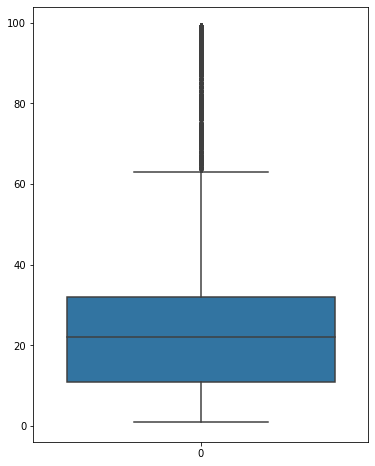

In [561]:
plt.figure(figsize=(6,8))
sns.boxplot(data["Kit Number"]);
plt.show()

In [562]:
data["Kit Number"].fillna(data["Kit Number"].median(),inplace=True)
data[data["Kit Number"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined


BEST OVERALL PLAYER
*Just few players have overall ratings for the best positons so they rest get none or 0.

In [563]:
data["Best Overall Rating"].dropna()

7116     <span class="bp3-tag p p-64">64</span>
7698     <span class="bp3-tag p p-65">65</span>
7864     <span class="bp3-tag p p-66">66</span>
7907     <span class="bp3-tag p p-62">62</span>
7919     <span class="bp3-tag p p-78">78</span>
8061     <span class="bp3-tag p p-76">76</span>
8538     <span class="bp3-tag p p-80">80</span>
9314     <span class="bp3-tag p p-77">77</span>
9420     <span class="bp3-tag p p-65">65</span>
9480     <span class="bp3-tag p p-62">62</span>
13299    <span class="bp3-tag p p-54">54</span>
13986    <span class="bp3-tag p p-60">60</span>
14059    <span class="bp3-tag p p-63">63</span>
14366    <span class="bp3-tag p p-56">56</span>
14477    <span class="bp3-tag p p-60">60</span>
15328    <span class="bp3-tag p p-64">64</span>
15821    <span class="bp3-tag p p-64">64</span>
16037    <span class="bp3-tag p p-65">65</span>
16779    <span class="bp3-tag p p-58">58</span>
16835    <span class="bp3-tag p p-59">59</span>
16968    <span class="bp3-tag p p-58">58

In [564]:
data["Best Overall Rating"].fillna(0,inplace=True)
data[data["Best Overall Rating"].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined


In [565]:
data["Best Overall Rating"] = data["Best Overall Rating"].str.split(">").str[-2]
data["Best Overall Rating"].dropna()

7116     64</span
7698     65</span
7864     66</span
7907     62</span
7919     78</span
8061     76</span
8538     80</span
9314     77</span
9420     65</span
9480     62</span
13299    54</span
13986    60</span
14059    63</span
14366    56</span
14477    60</span
15328    64</span
15821    64</span
16037    65</span
16779    58</span
16835    59</span
16968    58</span
Name: Best Overall Rating, dtype: object

In [566]:
data["Best Overall Rating"] = data["Best Overall Rating"].str.split("<").str[0]

In [567]:
data["Best Overall Rating"] = data["Best Overall Rating"].astype(float)
data["Best Overall Rating"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17655   NaN
17656   NaN
17657   NaN
17658   NaN
17659   NaN
Name: Best Overall Rating, Length: 17660, dtype: float64

In [570]:
data["Best Overall Rating"].fillna(0,inplace=True)
data["Best Overall Rating"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17655    0.0
17656    0.0
17657    0.0
17658    0.0
17659    0.0
Name: Best Overall Rating, Length: 17660, dtype: float64

In [571]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        17660 non-null  int64         
 1   Name                      17660 non-null  object        
 2   Age                       17660 non-null  int64         
 3   Photo                     17660 non-null  object        
 4   Nationality               17660 non-null  object        
 5   Flag                      17660 non-null  object        
 6   Overall                   17660 non-null  int64         
 7   Potential                 17660 non-null  int64         
 8   Club                      17660 non-null  object        
 9   Club Logo                 17660 non-null  object        
 10  Value(£)                  17660 non-null  float64       
 11  Wage(£)                   17660 non-null  float64       
 12  Special           

END

In [572]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,SUB,2018-07-01,None,2026.0,189.0,180.810,157000000.0,8.0,0.0,2018
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,LCM,2020-01-30,None,2026.0,179.0,152.145,155000000.0,8.0,0.0,2020
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,LB,2020-09-14,None,2024.0,172.0,152.145,97700000.0,19.0,0.0,2020
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,RCM,2015-08-30,None,2025.0,181.0,154.350,198900000.0,17.0,0.0,2015
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,RCM,2020-09-01,None,2026.0,172.0,149.940,154400000.0,23.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,RES,2022-04-11,None,2027.0,190.0,171.990,218000.0,35.0,0.0,2022
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,RES,2022-01-01,None,2026.0,195.0,185.220,188000.0,21.0,0.0,2022
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,RES,2021-06-06,None,2023.0,190.0,180.810,142000.0,12.0,0.0,2021
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,RES,2020-01-01,None,2021.0,187.0,174.195,214000.0,40.0,0.0,2020


In [573]:
data.to_csv("CLEAN_FIFA23_official_data.csv")